In [1]:
import pandas as pd
from utils import *

In [2]:
mode = 'fullsensor'
remove_null = True
len_seq = 24 
stride = 8 

opp_class_names = ['Null','Open Door 1','Open Door 2','Close Door 1','Close Door 2','Open Fridge',
'Close Fridge','Open Dishwasher','Close Dishwasher','Open Drawer 1','Close Drawer 1','Open Drawer 2','Close Drawer 2',
'Open Drawer 3','Close Drawer 3','Clean Table','Drink from Cup','Toggle Switch']

opp_class_names_mod = ['Open Door 1','Open Door 2','Close Door 1','Close Door 2','Open Fridge',
'Close Fridge','Open Dishwasher','Close Dishwasher','Open Drawer 1','Close Drawer 1','Open Drawer 2','Close Drawer 2',
'Open Drawer 3','Close Drawer 3','Clean Table','Drink from Cup','Toggle Switch']

series_index = {0:'Null', 1:'Open Door 1', 2:'Open Door 2', 3:'Close Door 1', 4:'Close Door 2', 5:'Open Fridge', 6:'Close Fridge', 7:'Open Dishwasher', 8:'Close Dishwasher', 9:'Open Drawer 1', 10:'Close Drawer 1', 11:'Open Drawer 2', 12:'Close Drawer 2', 13:'Open Drawer 3', 14:'Close Drawer 3', 15:'Clean Table', 16:'Drink from Cup', 17:'Toggle Switch'}

series_index_mod = {0:'Null', 1:'Open Door 1', 2:'Open Door 2', 3:'Close Door 1', 4:'Close Door 2', 5:'Open Fridge', 6:'Close Fridge', 7:'Open Dishwasher', 8:'Close Dishwasher', 9:'Open Drawer 1', 10:'Close Drawer 1', 11:'Open Drawer 2', 12:'Close Drawer 2', 13:'Open Drawer 3', 14:'Close Drawer 3', 15:'Clean Table', 16:'Drink from Cup', 17:'Toggle Switch'}

In [3]:
X_train, y_train = load_data(mode,'train',len_seq,stride,remove=remove_null)
X_val, y_val = load_data(mode,'val',len_seq,stride,remove=remove_null)
X_test, y_test = load_data(mode,'test',len_seq,stride,remove=remove_null)

Got (51116, 113) samples from fullsensor/train_data_1
Got (27825, 113) samples from fullsensor/train_data_10
Got (42797, 113) samples from fullsensor/train_data_6
Got (26717, 113) samples from fullsensor/train_data_12
Got (32955, 113) samples from fullsensor/train_data_4
Got (32224, 113) samples from fullsensor/train_data_2
Got (70928, 113) samples from fullsensor/train_data_8
Got (30182, 113) samples from fullsensor/train_data_7
Got (34232, 113) samples from fullsensor/train_data_11
Got (54966, 113) samples from fullsensor/train_data_0
Got (33273, 113) samples from fullsensor/train_data_3
Got (53398, 113) samples from fullsensor/train_data_5
Got (37223, 113) samples from fullsensor/train_data_9
Got (32748, 113) samples from fullsensor/val_data_0
Got (26495, 113) samples from fullsensor/val_data_3
Got (31826, 113) samples from fullsensor/val_data_1
Got (27681, 113) samples from fullsensor/val_data_2
Got (30127, 113) samples from fullsensor/test_data_0


In [ ]:
x_train_NULL, y_train_NULL = get_null_data(mode,'train',len_seq,stride, 0)
x_val_NULL, y_val_NULL = get_null_data(mode,'val',len_seq,stride, 0)

In [ ]:
X_train = X_train + x_train_NULL
y_train = y_train + y_train_NULL  
X_val = X_val + x_val_NULL  
y_val = y_val + y_val_NULL 

In [49]:
train_stats = np.unique([a for y in y_train for a in y],return_counts=True)[1]
val_stats = np.unique([a for y in y_val for a in y],return_counts=True)[1]
test_stats = np.unique([a for y in y_test for a in y],return_counts=True)[1]

In [50]:
series_train = pd.Series(train_stats)
series_val = pd.Series(val_stats)
series_test = pd.Series(test_stats)

In [59]:
series_train = series_train.rename(series_index)
series_val = series_val.rename(series_index)
series_test = series_test.rename(series_index)

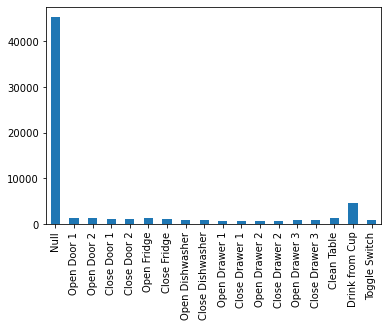

In [60]:
series_train.plot(kind='bar')

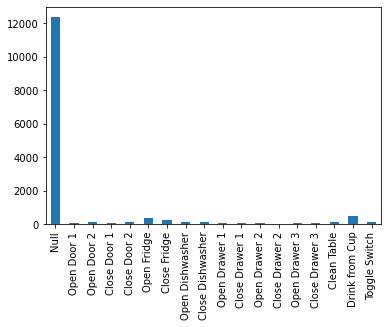

In [61]:
series_val.plot(kind='bar')

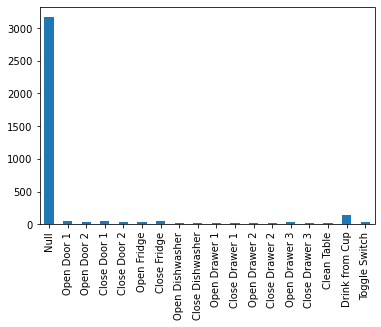

In [62]:
series_test.plot(kind='bar')